In [2]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2a753240e50>

M33's Altitude = 0.13 deg


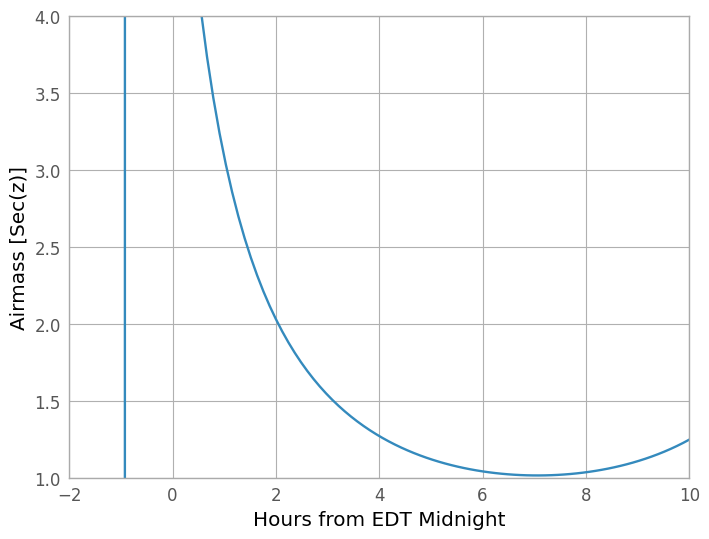

In [11]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

m33 = SkyCoord.from_name("M33")
bear_mountain = EarthLocation(lat=41.3 * u.deg, lon=-74 * u.deg, height=390 * u.m)
utcoffset = -4 * u.hour  # Eastern Daylight Time
time = Time("2012-7-12 23:00:00") - utcoffset
m33altaz = m33.transform_to(AltAz(obstime=time, location=bear_mountain))
print(f"M33's Altitude = {m33altaz.alt:.2}")
midnight = Time("2012-7-13 00:00:00") - utcoffset
delta_midnight = np.linspace(-2, 10, 100) * u.hour
frame_July13night = AltAz(obstime=midnight + delta_midnight, location=bear_mountain)
m33altazs_July13night = m33.transform_to(frame_July13night)
m33airmasss_July13night = m33altazs_July13night.secz
plt.plot(delta_midnight, m33airmasss_July13night)
plt.xlim(-2, 10)
plt.ylim(1, 4)
plt.xlabel("Hours from EDT Midnight")
plt.ylabel("Airmass [Sec(z)]")
plt.show()

In [17]:
from astropy.coordinates import get_sun

delta_midnight = np.linspace(-12, 12, 1000) * u.hour
times_July12_to_13 = midnight + delta_midnight
frame_July12_to_13 = AltAz(obstime=times_July12_to_13, location=bear_mountain)
sunaltazs_July12_to_13 = get_sun(times_July12_to_13).transform_to(frame_July12_to_13)

In [23]:
from astropy.coordinates import get_body

moon_July12_to_13 = get_body("moon", times_July12_to_13)
moonaltazs_July12_to_13 = moon_July12_to_13.transform_to(frame_July12_to_13)
m33altazs_July12_to_13 = m33.transform_to(frame_July12_to_13)

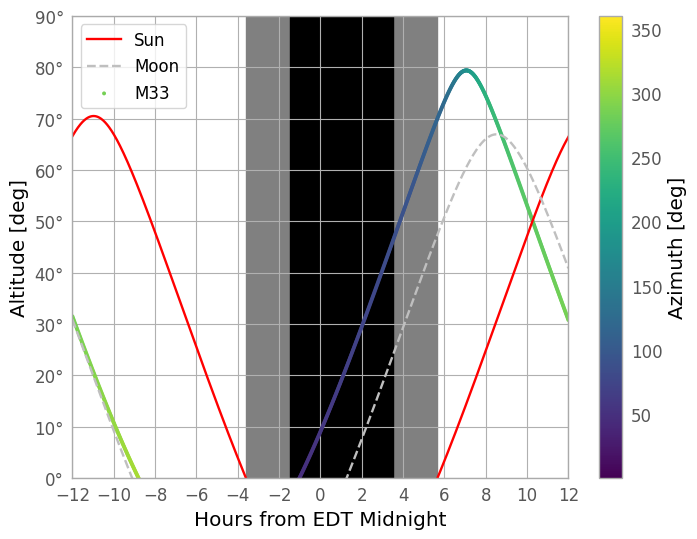

In [25]:
plt.plot(delta_midnight, sunaltazs_July12_to_13.alt, color="r", label="Sun")
plt.plot(
    delta_midnight, moonaltazs_July12_to_13.alt, color=[0.75] * 3, ls="--", label="Moon"
)
plt.scatter(
    delta_midnight,
    m33altazs_July12_to_13.alt,
    c=m33altazs_July12_to_13.az.value,
    label="M33",
    lw=0,
    s=8,
    cmap="viridis",
)
plt.fill_between(
    delta_midnight,
    0 * u.deg,
    90 * u.deg,
    sunaltazs_July12_to_13.alt < -0 * u.deg,
    color="0.5",
    zorder=0,
)
plt.fill_between(
    delta_midnight,
    0 * u.deg,
    90 * u.deg,
    sunaltazs_July12_to_13.alt < -18 * u.deg,
    color="k",
    zorder=0,
)
plt.colorbar().set_label("Azimuth [deg]")
plt.legend(loc="upper left")
plt.xlim(-12 * u.hour, 12 * u.hour)
plt.xticks((np.arange(13) * 2 - 12) * u.hour)
plt.ylim(0 * u.deg, 90 * u.deg)
plt.xlabel("Hours from EDT Midnight")
plt.ylabel("Altitude [deg]")
plt.show()

In [12]:
import numpy as np
from astropy.nddata import NDData
from astropy.nddata import StdDevUncertainty

array = np.zeros((12, 12, 12))  # a 3-dimensional array with all zeros
ndd1 = NDData(array)
ndd2 = NDData([1, 2, 3, 4])
ndd2
ndd2.data
data = np.array([1,2,3,4])
mask = data > 2
unit = 'erg / s'
uncertainty = StdDevUncertainty(np.sqrt(data)) # representing standard deviation
meta = {'object': 'fictional data.'}
ndd = NDData(data, mask=mask, unit=unit, uncertainty=uncertainty,
             meta=meta)
ndd

NDData([1, 2, —, —], unit='erg / s')

In [14]:
from astropy.nddata import NDDataRef
ndd = NDDataRef(ndd)
ndd

NDDataRef([1, 2, —, —], unit='erg / s')

In [16]:
import astropy.units as u
ndd2 = ndd.add([4, -3.5, 3, 2.5] * u.erg / u.s)
ndd2

NDDataRef([ 5. , -1.5,  ———,  ———], unit='erg / s')

In [18]:
ndd2[2:]  # discard the first two elements  
ndd2[1]   # get the second element  

NDDataRef(-1.5, unit='erg / s')

In [24]:
import numpy as np
from astropy.modeling.models import Gaussian2D
rng = np.random.default_rng()
y, x = np.mgrid[0:500, 0:600]
data = (Gaussian2D(1, 150, 100, 20, 10, theta=0.5)(x, y) +
        Gaussian2D(0.5, 400, 300, 8, 12, theta=1.2)(x,y) +
        Gaussian2D(0.75, 250, 400, 5, 7, theta=0.23)(x,y) +
        Gaussian2D(0.9, 525, 150, 3, 3)(x,y) +
        Gaussian2D(0.6, 200, 225, 3, 3)(x,y))
data += 0.01 * rng.standard_normal((500, 600))
cosmic_ray_value = 0.997
data[100, 300:310] = cosmic_ray_value
print(data)

[[-9.13005456e-03  1.30990380e-02  5.56287345e-03 ...  1.84570465e-02
   2.16127719e-02 -2.61286739e-03]
 [-1.53512286e-03 -1.49241937e-02 -1.76153481e-02 ...  1.04214352e-03
   1.17155491e-02 -2.66033779e-03]
 [ 9.58075383e-03  6.89185185e-03 -6.98866171e-03 ... -5.52263337e-03
   9.42597358e-03 -1.74293500e-02]
 ...
 [ 1.32056251e-02 -1.33094372e-02  2.81178090e-03 ... -4.16491788e-03
  -5.81785013e-03 -3.57422892e-03]
 [ 7.57260248e-03  1.14517070e-02 -7.10062695e-05 ...  5.40949943e-03
   1.65304954e-02 -6.98672085e-04]
 [ 2.60539934e-03  1.30447188e-03  5.20654071e-03 ...  1.29936326e-02
   6.32145387e-03 -1.95154778e-03]]


In [1]:
from astropy.constants import G
print(G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [3]:
from astropy import constants as const
print(const.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [5]:
from astropy import units as u
F = (const.G * 3. * const.M_sun * 100 * u.kg) / (2.2 * u.au) ** 2
print(F.to(u.N))  

0.3675671602160826 N


In [15]:
print(const.c)

print(const.c.to('km/s'))

print(const.c.to('pc/yr'))  

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
299792.458 km / s
0.30660139378555057 pc / yr


In [17]:
const.c.cgs  

<Quantity 2.99792458e+10 cm / s>

In [34]:
print(const.M_jup)
print(const.M_earth)

  Name   = Jupiter mass
  Value  = 1.8981245973360505e+27
  Uncertainty  = 4.26589589320839e+22
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018
  Name   = Earth mass
  Value  = 5.972167867791379e+24
  Uncertainty  = 1.3422009501651213e+20
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018


In [38]:
import numpy as np
from astropy.nddata import NDData
array = np.zeros((12, 12, 12))  # a 3-dimensional array with all zeros
ndd1 = NDData(array)
print(ndd1)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [40]:
data = np.array([1,2,3,4])
mask = data > 2
unit = 'erg / s'
from astropy.nddata import StdDevUncertainty
uncertainty = StdDevUncertainty(np.sqrt(data)) # representing standard deviation
meta = {'object': 'fictional data.'}
ndd = NDData(data, mask=mask, unit=unit, uncertainty=uncertainty,
             meta=meta)
ndd

NDData([1, 2, —, —], unit='erg / s')

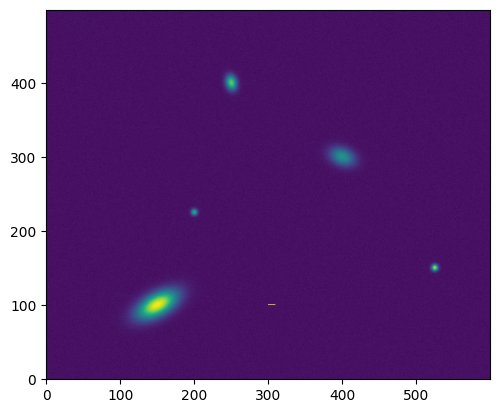

In [44]:
import numpy as np
from astropy.modeling.models import Gaussian2D
import matplotlib.pyplot as plt

rng = np.random.default_rng()
y, x = np.mgrid[0:500, 0:600]
data = (Gaussian2D(1, 150, 100, 20, 10, theta=0.5)(x, y) +
        Gaussian2D(0.5, 400, 300, 8, 12, theta=1.2)(x,y) +
        Gaussian2D(0.75, 250, 400, 5, 7, theta=0.23)(x,y) +
        Gaussian2D(0.9, 525, 150, 3, 3)(x,y) +
        Gaussian2D(0.6, 200, 225, 3, 3)(x,y))
data += 0.01 * rng.standard_normal((500, 600))
cosmic_ray_value = 0.997
data[100, 300:310] = cosmic_ray_value
plt.imshow(data, origin='lower')

In [52]:
from astropy.nddata import CCDData

mask = (data == cosmic_ray_value)
ccd = CCDData(data, mask=mask,
              meta={'object': 'fake galaxy', 'filter': 'R'},
              unit='adu')
# print(ccd)
ccd2 = ccd[:200, :]
ccd2.data.shape
ccd2.mask.shape
# Show the mask in a region around the cosmic ray:
ccd2.mask[99:102, 299:311]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [76]:
from astropy.nddata import VarianceUncertainty
poisson_noise = np.ma.sqrt(np.ma.abs(ccd.data))
ccd.uncertainty = VarianceUncertainty(poisson_noise ** 2)
ccd.write('test_file.fits')


OSError: File test_file.fits already exists. If you mean to replace it then use the argument "overwrite=True".

In [78]:
ccd2 = CCDData.read('test_file.fits')
print(ccd2)

[[ 1.55371184e-02  1.25207709e-02 -1.27562146e-02 ...  8.11927297e-03
  -7.81013008e-03  6.24580611e-03]
 [-8.68440638e-05  1.82645466e-02 -2.65657596e-03 ...  8.34345487e-03
   6.61888636e-03  5.95901600e-03]
 [ 1.22510731e-03  1.48702687e-03  7.52435603e-03 ... -9.46184442e-03
  -2.48669430e-03  8.83591874e-03]
 ...
 [-2.65135156e-03  2.46097350e-03  3.03072731e-03 ...  1.92291788e-03
   5.52312002e-04 -2.67993233e-03]
 [-8.94932665e-03  5.90164014e-03 -8.72738220e-03 ...  5.23892214e-03
   4.46091118e-03  8.20657291e-03]
 [-1.66954876e-02 -2.06871979e-02 -3.80844200e-03 ... -7.71323311e-03
   1.47245094e-02  1.52877356e-02]] adu


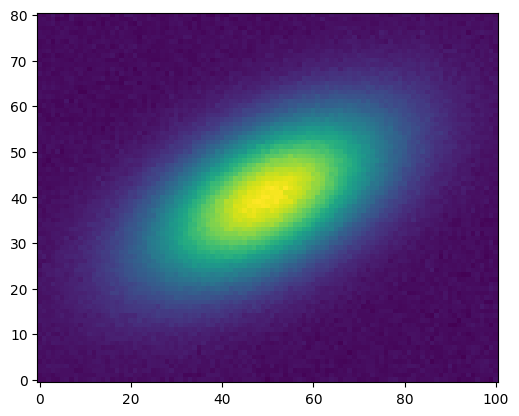

In [86]:
from astropy.nddata import Cutout2D
position = (149.7, 100.1)
size = (81, 101)     # pixels
cutout = Cutout2D(ccd, position, size)
plt.imshow(cutout.data, origin='lower') 
# plt.imshow(ccd, origin='lower')  
# cutout.plot_on_original(color='white') 

In [94]:
import numpy as np
from astropy.modeling import models
g = models.Gaussian1D(amplitude=1.2, mean=0.9, stddev=0.5)
print(g)
g.amplitude
g.mean
g.stddev 
g.amplitude = 0.8
g.amplitude
g(0.1)
g(np.linspace(0.5, 1.5, 7))  

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude mean stddev
    --------- ---- ------
          1.2  0.9    0.5


array([0.58091923, 0.71746405, 0.7929204 , 0.78415894, 0.69394278,
       0.54952605, 0.3894018 ])

In [98]:
from astropy.modeling.models import Gaussian1D
g = Gaussian1D(amplitude=1, mean=0, stddev=1)
g  
g.inputs
g(x=0)

1.0

In [106]:
from astropy.modeling.models import Gaussian1D
gset = Gaussian1D(amplitude=[1, 1.5, 2],
                  mean=[0, 1, 2],
                  stddev=[1., 1., 1.],
                  n_models=3)
print(gset)  
gset(1.)
gset([1, 2, 3])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 3
Parameters:
    amplitude mean stddev
    --------- ---- ------
          1.0  0.0    1.0
          1.5  1.0    1.0
          2.0  2.0    1.0


array([0.60653066, 0.90979599, 1.21306132])

In [108]:
from astropy.modeling.models import Linear1D
linear = Linear1D(slope=0.8, intercept=1.0)
linear.inverse

<Linear1D(slope=1.25, intercept=-1.25)>

In [118]:
from astropy.modeling.models import Polynomial1D
linear.inverse = Polynomial1D(degree=1, c0=-1.25, c1=1.25)
linear.inverse

<Polynomial1D(1, c0=-1.25, c1=1.25)>

In [120]:
from astropy.modeling import custom_model
def ellipsoid(x, y, z, x0=0, y0=0, z0=0, a=2, b=3, c=4, amp=1):
    rsq = ((x - x0) / a) ** 2 + ((y - y0) / b) ** 2 + ((z - z0) / c) ** 2
    val = (rsq < 1) * amp
    return val
class Ellipsoid3D(custom_model(ellipsoid)):
    # A 3D ellipsoid model
    def bounding_box(self):
        return ((self.z0 - self.c, self.z0 + self.c),
                (self.y0 - self.b, self.y0 + self.b),
                (self.x0 - self.a, self.x0 + self.a))
model1 = Ellipsoid3D()
model1.bounding_box

ModelBoundingBox(
    intervals={
        x0: Interval(lower=-2.0, upper=2.0)
        x1: Interval(lower=-3.0, upper=3.0)
        x2: Interval(lower=-4.0, upper=4.0)
    }
    model=Ellipsoid3D(inputs=('x0', 'x1', 'x2'))
    order='C'
)

In [122]:
model1(-5, 1, 1)
model1(-5, 1, 1, with_bounding_box=True)
model1(-5, 1, 1, with_bounding_box=True, fill_value=-1)

-1.0

In [124]:
from astropy.modeling.models import Polynomial1D
model2 = Polynomial1D(2)
model2.bounding_box = (-1, 1)
model2.bounding_box
model2(-2)
model2(-2, with_bounding_box=True)
model2(-2, with_bounding_box=True, fill_value=47)

47.0

In [126]:
from astropy.modeling.models import Polynomial2D
model3 = Polynomial2D(2)
model3.bounding_box = ((-2, 2), (-1, 1))
model3.bounding_box
model3(-2, 0)
model3(-2, 0, with_bounding_box=True)
model3(-2, 0, with_bounding_box=True, fill_value=7)

7.0

In [128]:
model1.bounding_box.bounding_box()
model2.bounding_box.bounding_box()
model3.bounding_box.bounding_box()

((-2, 2), (-1, 1))

In [130]:
from astropy.modeling import bind_bounding_box
model4 = Polynomial2D(3)
bind_bounding_box(model4, ((-1, 1), (-2, 2)), order='F')
model4.bounding_box
model4(-2, 0)
model4(-2, 0, with_bounding_box=True)
model4(-2, 0, with_bounding_box=True, fill_value=12)
model4.bounding_box.bounding_box()
model4.bounding_box.bounding_box(order='C')

((-2, 2), (-1, 1))

In [134]:
from astropy.modeling.models import Shift, Identity
model1 = Shift(1) & Shift(2) & Identity(1)
model1.inputs = ('x', 'y', 'slit_id')
bboxes = {
    0: ((0, 1), (1, 2)),
    1: ((2, 3), (3, 4))
}
print(bboxes)

{0: ((0, 1), (1, 2)), 1: ((2, 3), (3, 4))}


In [136]:
from astropy.modeling.core import bind_compound_bounding_box
selector_args = [('slit_id', True)]
bind_compound_bounding_box(model1, bboxes, selector_args, order='F')
model1.bounding_box
model1(0.5, 1.5, 0, with_bounding_box=True)
model1(0.5, 1.5, 1, with_bounding_box=True)

(np.float64(nan), np.float64(nan), np.float64(nan))

In [138]:
model2 = Shift(1) & Shift(2) & Identity(2)
model2.inputs = ('x', 'y', 'slit_x', 'slit_y')
bboxes = {
    (0, 0): ((0, 1), (1, 2)),
    (0, 1): ((2, 3), (3, 4)),
    (1, 0): ((4, 5), (5, 6)),
    (1, 1): ((6, 7), (7, 8)),
}
selector_args = [('slit_x', True), ('slit_y', True)]
bind_compound_bounding_box(model2, bboxes, selector_args, order='F')
model2.bounding_box
model2(0.5, 1.5, 0, 0, with_bounding_box=True)
model2(0.5, 1.5, 1, 1, with_bounding_box=True)

(np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan))

In [142]:
from astropy.modeling.models import Polynomial2D
from astropy.modeling import bind_compound_bounding_box
model = Polynomial2D(3)
bboxes = {
    0: ((0, 1), (1, 2)),
    1: ((2, 3), (3, 4))
}
selector_args = [('x', False)]
bind_compound_bounding_box(model, bboxes, selector_args, order='F')
model.bounding_box
model(0.5, 1.5, with_bounding_box=0)
model(0.5, 1.5, with_bounding_box=1)

nan

In [144]:
from astropy.modeling.models import Polynomial1D
from astropy.modeling import bind_bounding_box
model1 = Polynomial2D(3)
bind_bounding_box(model1, {'x': (-1, 1)}, ignored=['y'])
model1.bounding_box
model1(-2, 0, with_bounding_box=True)
model1(0, 300, with_bounding_box=True)

0.0

In [146]:
from astropy.modeling import bind_compound_bounding_box
model2 = Polynomial2D(3)
bboxes = {
    0: {'x': (0, 1)},
    1: {'x': (1, 2)}
}
selector_args = [('x', False)]
bind_compound_bounding_box(model2, bboxes, selector_args, ignored=['y'], order='F')
model2.bounding_box
model2(0.5, 300, with_bounding_box=0)
model2(0.5, 300, with_bounding_box=1)

nan

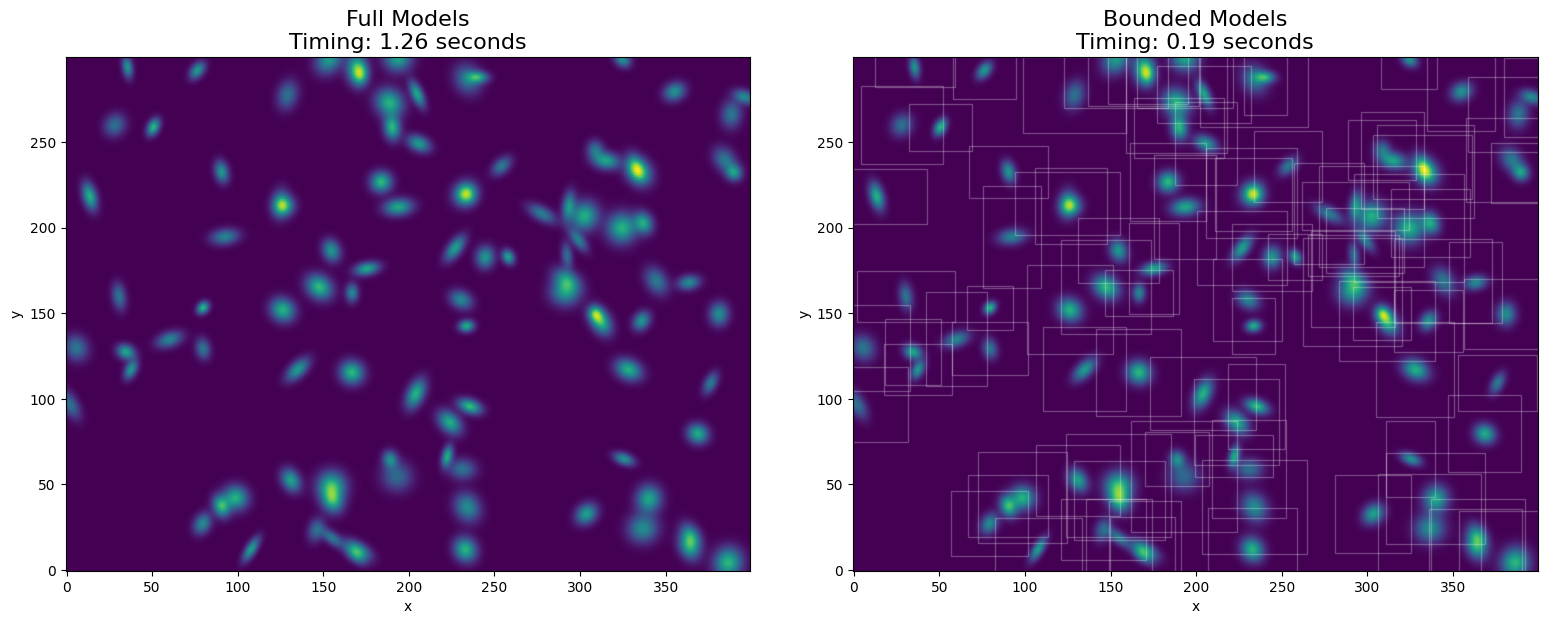

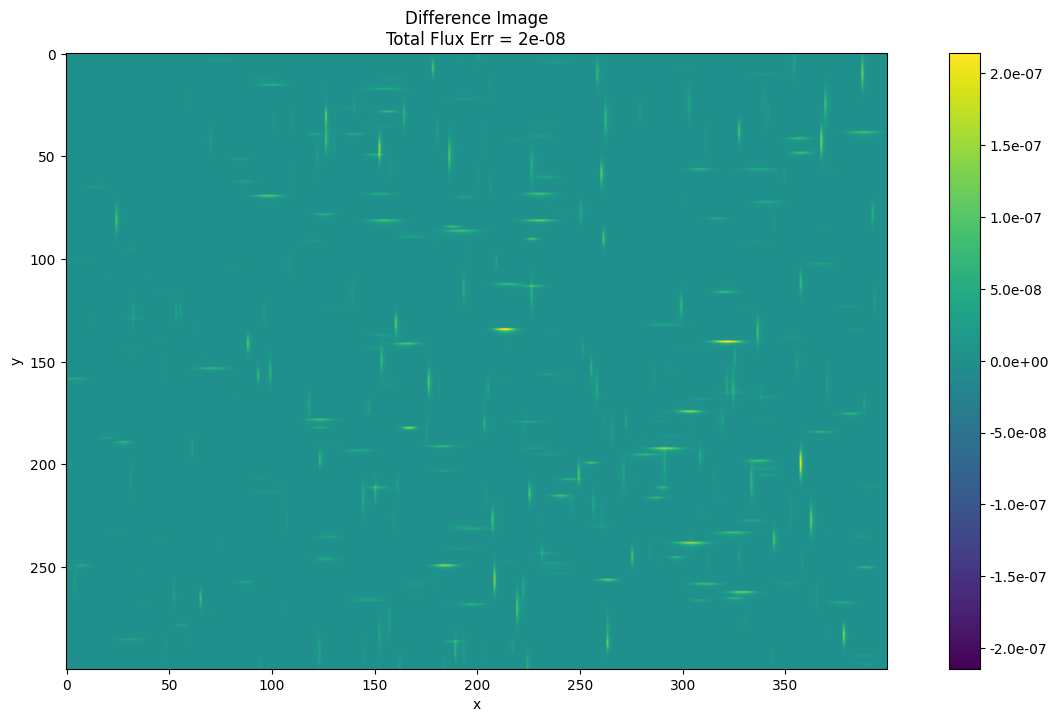

In [148]:
import numpy as np
from time import time
from astropy.modeling import models
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

imshape = (300, 400)
y, x = np.indices(imshape)

# Generate random source model list
rng = np.random.default_rng(0)
nsrc = 100
model_params = [
    dict(amplitude=rng.uniform(.5, 1),
         x_mean=rng.uniform(0, imshape[1] - 1),
         y_mean=rng.uniform(0, imshape[0] - 1),
         x_stddev=rng.uniform(2, 6),
         y_stddev=rng.uniform(2, 6),
         theta=rng.uniform(0, 2 * np.pi))
    for _ in range(nsrc)]

model_list = [models.Gaussian2D(**kwargs) for kwargs in model_params]

# Render models to image using bounding boxes
bb_image = np.zeros(imshape)
t_bb = time()
for model in model_list:
    model.render(bb_image)
t_bb = time() - t_bb

# Render models to image using full evaluation
full_image = np.zeros(imshape)
t_full = time()
for model in model_list:
    model.bounding_box = None
    model.render(full_image)
t_full = time() - t_full

flux = full_image.sum()
diff = (full_image - bb_image)
max_err = diff.max()

# Plots
plt.figure(figsize=(16, 7))
plt.subplots_adjust(left=.05, right=.97, bottom=.03, top=.97, wspace=0.15)

# Full model image
plt.subplot(121)
plt.imshow(full_image, origin='lower')
plt.title(f'Full Models\nTiming: {t_full:.2f} seconds', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')

# Bounded model image with boxes overplotted
ax = plt.subplot(122)
plt.imshow(bb_image, origin='lower')
for model in model_list:
    del model.bounding_box  # Reset bounding_box to its default
    dy, dx = np.diff(model.bounding_box).flatten()
    pos = (model.x_mean.value - dx / 2, model.y_mean.value - dy / 2)
    r = Rectangle(pos, dx, dy, edgecolor='w', facecolor='none', alpha=.25)
    ax.add_patch(r)
plt.title(f'Bounded Models\nTiming: {t_bb:.2f} seconds', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')

# Difference image
plt.figure(figsize=(16, 8))
plt.subplot(111)
plt.imshow(diff, vmin=-max_err, vmax=max_err)
plt.colorbar(format='%.1e')
plt.title(f'Difference Image\nTotal Flux Err = {((flux - np.sum(bb_image)) / flux):.0e}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [150]:
from astropy.modeling import models
g = models.Gaussian1D(amplitude=[1, 2], mean=[0, 0],
                      stddev=[0.1, 0.2], n_models=2)
print(g)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 2
Parameters:
    amplitude mean stddev
    --------- ---- ------
          1.0  0.0    0.1
          2.0  0.0    0.2


In [152]:
import numpy as np
from astropy.modeling.models import Polynomial2D
from astropy.modeling.fitting import LinearLSQFitter
fitter = LinearLSQFitter()
x = np.arange(8).reshape(2, 4)
y = x
z = np.asarray([2 * x + 1, x + 4, x + 3])
print(z.shape)
m = Polynomial2D(1, n_models=3, model_set_axis=0)
mfit = fitter(m, x, y, z)

(3, 2, 4)


In [164]:
from astropy.modeling import models
g1 = models.Gaussian1D(1, 0, 0.2)
g2 = models.Gaussian1D(2.5, 0.5, 0.1)
g1_plus_2 = g1 + g2
print(g1_plus_2)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1., mean=0., stddev=0.2)>

    [1]: <Gaussian1D(amplitude=2.5, mean=0.5, stddev=0.1)>
Parameters:
    amplitude_0 mean_0 stddev_0 amplitude_1 mean_1 stddev_1
    ----------- ------ -------- ----------- ------ --------
            1.0    0.0      0.2         2.5    0.5      0.1


Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.071351938264488
            Iterations: 15
            Function evaluations: 131
            Gradient evaluations: 15


Text(0, 0.5, 'Flux')

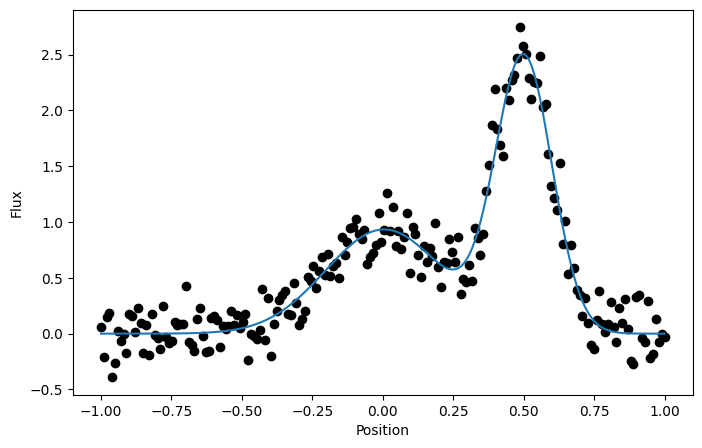

In [166]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
rng = np.random.default_rng(seed=42)
g1 = models.Gaussian1D(1, 0, 0.2)
g2 = models.Gaussian1D(2.5, 0.5, 0.1)
x = np.linspace(-1, 1, 200)
y = g1(x) + g2(x) + rng.normal(0., 0.2, x.shape)

# Now to fit the data create a new superposition with initial
# guesses for the parameters:
gg_init = models.Gaussian1D(1, 0, 0.1) + models.Gaussian1D(2, 0.5, 0.1)
fitter = fitting.SLSQPLSQFitter()

with warnings.catch_warnings():
    # Ignore a warning on clipping to bounds from the fitter
    warnings.filterwarnings('ignore', message='Values in x were outside bounds',
                            category=RuntimeWarning)
    gg_fit = fitter(gg_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, gg_fit(x))
plt.xlabel('Position')
plt.ylabel('Flux')

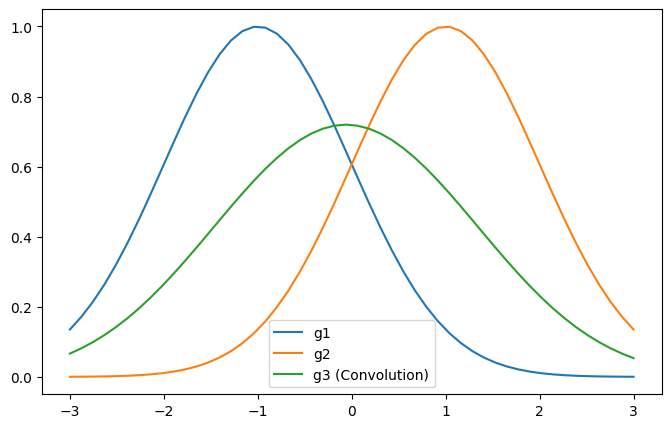

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models
from astropy.convolution import convolve_models

g1 = models.Gaussian1D(1, -1, 1)
g2 = models.Gaussian1D(1, 1, 1)
g3 = convolve_models(g1, g2)

x = np.linspace(-3, 3, 50)
plt.figure(figsize=(8, 5))
plt.plot(x, g1(x), label='g1')
plt.plot(x, g2(x), label='g2')
plt.plot(x, g3(x), label='g3 (Convolution)')
plt.legend()

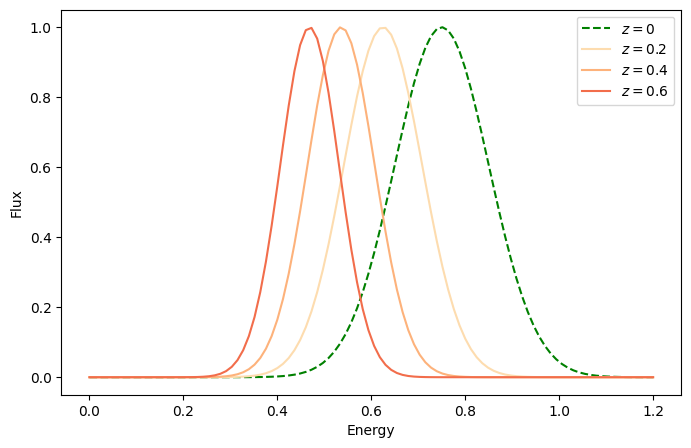

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import RedshiftScaleFactor, Gaussian1D

x = np.linspace(0, 1.2, 100)
g0 = RedshiftScaleFactor(0) | Gaussian1D(1, 0.75, 0.1)

plt.figure(figsize=(8, 5))
plt.plot(x, g0(x), 'g--', label='$z=0$')

for z in (0.2, 0.4, 0.6):
    g = RedshiftScaleFactor(z) | Gaussian1D(1, 0.75, 0.1)
    plt.plot(x, g(x), color=plt.cm.OrRd(z),
             label=f'$z={z}$')

plt.xlabel('Energy')
plt.ylabel('Flux')
plt.legend()

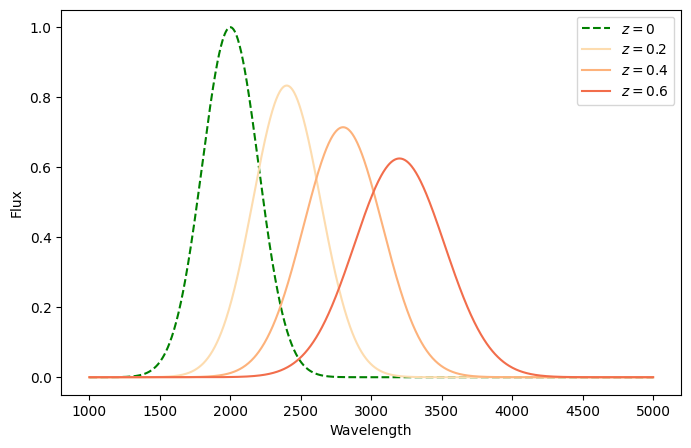

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import RedshiftScaleFactor, Gaussian1D, Scale

x = np.linspace(1000, 5000, 1000)
g0 = Gaussian1D(1, 2000, 200)  # No redshift is same as redshift with z=0

plt.figure(figsize=(8, 5))
plt.plot(x, g0(x), 'g--', label='$z=0$')

for z in (0.2, 0.4, 0.6):
    rs = RedshiftScaleFactor(z).inverse  # Redshift in wavelength space
    sc = Scale(1. / (1 + z))  # Rescale the flux to conserve energy
    g = rs | g0 | sc
    plt.plot(x, g(x), color=plt.cm.OrRd(z),
             label=f'$z={z}$')

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend()

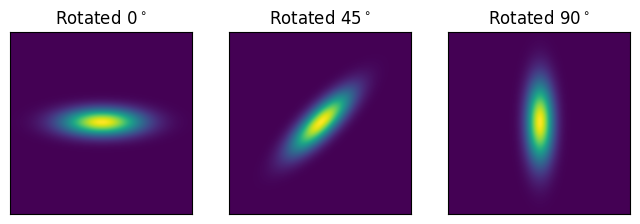

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Rotation2D, Gaussian2D

x, y = np.mgrid[-1:1:0.01, -1:1:0.01]

plt.figure(figsize=(8, 2.5))

for idx, theta in enumerate((0, 45, 90)):
    g = Rotation2D(theta) | Gaussian2D(1, 0, 0, 0.1, 0.3)
    plt.subplot(1, 3, idx + 1)
    plt.imshow(g(x, y), origin='lower')
    plt.xticks([])
    plt.yticks([])
    plt.title(rf'Rotated $ {theta}^\circ $')

In [184]:
from astropy.modeling.models import Scale
separate_scales = Scale(factor=1.2) & Scale(factor=3.4)
separate_scales(1, 2)  
scale_and_rotate = ((Scale(factor=1.2) & Scale(factor=3.4)) |
                    Rotation2D(90))
scale_and_rotate.n_inputs
scale_and_rotate.n_outputs
scale_and_rotate(1, 2)  

(-6.8, 1.2000000000000004)

In [186]:
from numpy import allclose
from astropy.modeling.models import AffineTransformation2D
affine = AffineTransformation2D(matrix=[[0, -3.4], [1.2, 0]])
# May be small numerical differences due to different implementations
allclose(scale_and_rotate(1, 2), affine(1, 2))

True

In [188]:
from astropy.modeling.models import Const1D
A = Const1D(1.1, name='A')
B = Const1D(2.1, name='B')
C = Const1D(3.1, name='C')
M = A + B * C
print(M)



Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] * [2]
Components: 
    [0]: <Const1D(amplitude=1.1, name='A')>

    [1]: <Const1D(amplitude=2.1, name='B')>

    [2]: <Const1D(amplitude=3.1, name='C')>
Parameters:
    amplitude_0 amplitude_1 amplitude_2
    ----------- ----------- -----------
            1.1         2.1         3.1


In [190]:
from astropy.modeling.models import RedshiftScaleFactor
(RedshiftScaleFactor() | (Gaussian1D() + Gaussian1D())).param_names

('z_0',
 'amplitude_1',
 'mean_1',
 'stddev_1',
 'amplitude_2',
 'mean_2',
 'stddev_2')